In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv(r"C:\Users\thefl\Documents\other zip folders\archive (1)\diabetes_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [5]:
df.value_counts()

gender  age   hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level  diabetes
Female  80.0  0             0              No Info          27.32  6.2          90                   0           9
                                                                   6.5          159                  0           9
                                                                   4.0          85                   0           8
                                                                                126                  0           7
                                                                                158                  0           7
                                                                                                                ..
Male    80.0  1             1              not current      29.30  5.8          100                  0           1
                                                            34.24  6.2          140  

# Preprocessing Pipeline

In [6]:
cat_col=['gender','smoking_history']
num_col=['age','bmi','HbA1c_level','blood_glucose_level']

In [7]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)




categorical_transformer=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
]
)

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,num_col),
        ('cat',categorical_transformer,cat_col)
    ],remainder='passthrough',force_int_remainder_cols=False
)

In [8]:
preprocessor

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'HbA1c_level',
                                  'blood_glucose_level']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'smoking_history'])])

In [141]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X=df.drop(columns=['diabetes'])
Y=df['diabetes']

# spliting data

In [143]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,random_state=42)

In [144]:
print(len(X_train),len(X_test))

75000 25000


In [145]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,Female,13.0,0,0,No Info,20.82,5.8,126
80184,Female,3.0,0,0,No Info,21.00,5.0,145
19864,Male,63.0,0,0,former,25.32,3.5,200
76699,Female,2.0,0,0,never,17.43,6.1,126
92991,Female,33.0,0,0,not current,40.08,6.2,200
...,...,...,...,...,...,...,...,...
21271,Female,25.0,0,0,No Info,27.32,5.8,145
34014,Female,42.0,0,0,No Info,20.05,4.0,200
81355,Female,56.0,0,0,No Info,27.32,6.5,90
65720,Male,40.0,0,0,never,29.06,5.0,200


In [152]:
X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.transform(X_test)


smote=SMOTE(random_state=42)
X_train_res,y_train_res=smote.fit_resample(X_train_transformed,y_train)

In [153]:
class_counts=df['diabetes'].value_counts()
print(class_counts)

majority_class=class_counts[0]
minority_class=class_counts[1]
ratio=majority_class/minority_class
print(f"Class Ratio(Majority:Minority):{ratio:.2f}:1")

diabetes
0    91500
1     8500
Name: count, dtype: int64
Class Ratio(Majority:Minority):10.76:1


In [198]:
clf=Pipeline(
    steps=[('preprocessor',preprocessor),
          ('Classifier',XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss'))]
)

In [199]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [208]:
from joblib import dump

dump(clf,"Pipline_clf.joblib")


['Pipline_clf.joblib']

In [200]:
prediction=clf.predict(X_test)

In [201]:
from sklearn.metrics import recall_score

In [202]:
print(recall_score(y_test,prediction))

0.8832558139534884


In [203]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22850
           1       0.53      0.88      0.66      2150

    accuracy                           0.92     25000
   macro avg       0.76      0.90      0.81     25000
weighted avg       0.95      0.92      0.93     25000

recall_score:88


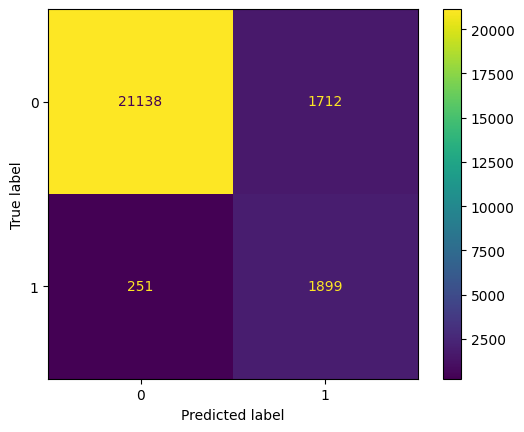

In [204]:

print(classification_report(y_test,prediction))
print(f"recall_score:{round(recall_score(y_test,prediction)*100)}")

cm=confusion_matrix(y_test,prediction,labels=clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf.classes_)
disp.plot()
plt.show()

In [197]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],   
    'max_depth': [3, 5, 7],                
    'subsample': [0.8, 1.0],               
    'colsample_bytree': [0.8, 1.0],         
    'gamma': [0, 0.1, 0.2],                
    'scale_pos_weight': [10.76, 15],       
    'n_estimators': [100, 200]              
}

In [169]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [170]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',  # Use 'aucpr' for AUC-PR
    random_state=42,
    device='gpu'
)

In [171]:
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='gpu',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'scale_pos_weight': [10.76, 15],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=2)

In [172]:
best_model=grid_search.best_estimator_
best_params=grid_search.best_params_
best_score=grid_search.best_score_


In [173]:
best_score

np.float64(1.0)

In [174]:
best_params

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'scale_pos_weight': 10.76,
 'subsample': 0.8}

In [175]:
params = {
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 100,
    'scale_pos_weight': 10.76,
    'subsample': 0.8
}

In [210]:
from joblib import load
pretrained=load('Pipline_clf.joblib')

In [242]:
prediction=pretrained.predict(X_test)

In [243]:
prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(25000,))

In [214]:
non_diabetes_sample=df.iloc[1,:]

gender                  Female
age                       54.0
hypertension                 0
heart_disease                0
smoking_history        No Info
bmi                      27.32
HbA1c_level                6.6
blood_glucose_level         80
diabetes                     0
Name: 1, dtype: object

In [219]:
diabetes_df=diabetes_df.drop(columns=['diabetes'])

In [217]:
diabetes_df=df.loc[df['diabetes']==1]

In [220]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
6,Female,44.0,0,0,never,19.31,6.5,200
26,Male,67.0,0,1,not current,27.32,6.5,200
38,Male,50.0,1,0,current,27.32,5.7,260
40,Male,73.0,0,0,former,25.91,9.0,160
53,Female,53.0,0,0,former,27.32,7.0,159
...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140
99938,Male,55.0,0,1,former,30.42,6.2,300
99957,Female,61.0,0,0,No Info,34.45,6.5,280
99962,Female,58.0,1,0,never,38.31,7.0,200


In [240]:
sample_df=df.iloc[1,:]

In [241]:
sample_df

gender                  Female
age                       54.0
hypertension                 0
heart_disease                0
smoking_history        No Info
bmi                      27.32
HbA1c_level                6.6
blood_glucose_level         80
diabetes                     0
Name: 1, dtype: object